<a href="https://colab.research.google.com/github/Yasmic/MnistClassification/blob/master/MnistClassification1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mnist calssifiacation

In [0]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
import numpy as np

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

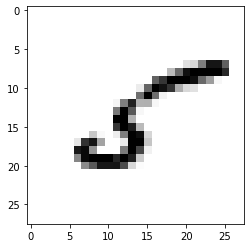

In [8]:
plt.imshow(X_train[11],cmap='gray_r')

In [9]:
y_train[11]

5

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_test.shape

(10000, 28, 28)

In [0]:

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [13]:
X_train.shape

(60000, 28, 28, 1)

In [14]:
X_test.shape

(10000, 28, 28, 1)

In [15]:
# show preferred channel order
from keras import backend
print(backend.image_data_format())

channels_last


In [0]:
X_train = X_train / 255
X_test = X_test / 255

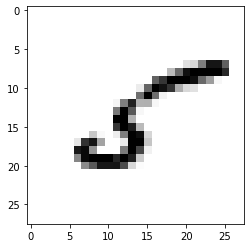

In [18]:
plt.imshow(X_train[11,:,:,0],cmap="gray_r")

In [19]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [20]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [0]:

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


In [22]:
y_test.shape

(10000, 10)

In [0]:
num_classes = y_test.shape[1]

In [0]:
num_classes = y_test.shape[0]

In [0]:

def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=( 28, 28,1), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))  
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(10, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [0]:
model = baseline_model()

In [39]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

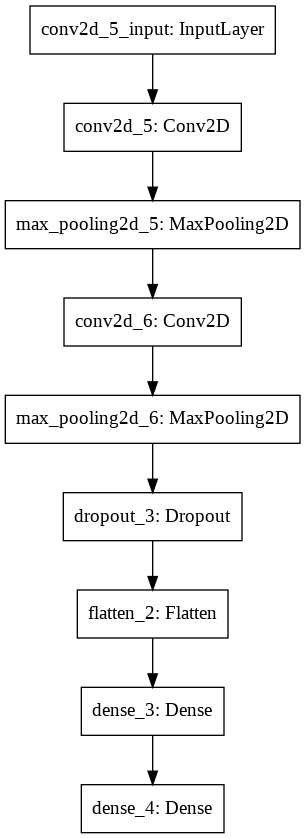

In [40]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [41]:

history =model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 4s - loss: 0.2457 - accuracy: 0.9291 - val_loss: 0.0626 - val_accuracy: 0.9797
Epoch 2/10
 - 2s - loss: 0.0645 - accuracy: 0.9800 - val_loss: 0.0415 - val_accuracy: 0.9861
Epoch 3/10
 - 2s - loss: 0.0464 - accuracy: 0.9860 - val_loss: 0.0331 - val_accuracy: 0.9889
Epoch 4/10
 - 2s - loss: 0.0368 - accuracy: 0.9888 - val_loss: 0.0257 - val_accuracy: 0.9911
Epoch 5/10
 - 2s - loss: 0.0301 - accuracy: 0.9902 - val_loss: 0.0276 - val_accuracy: 0.9908
Epoch 6/10
 - 2s - loss: 0.0247 - accuracy: 0.9921 - val_loss: 0.0230 - val_accuracy: 0.9921
Epoch 7/10
 - 2s - loss: 0.0209 - accuracy: 0.9930 - val_loss: 0.0253 - val_accuracy: 0.9918
Epoch 8/10
 - 2s - loss: 0.0195 - accuracy: 0.9938 - val_loss: 0.0263 - val_accuracy: 0.9918
Epoch 9/10
 - 2s - loss: 0.0175 - accuracy: 0.9944 - val_loss: 0.0220 - val_accuracy: 0.9925
Epoch 10/10
 - 2s - loss: 0.0141 - accuracy: 0.9953 - val_loss: 0.0231 - val_accuracy: 0.9922


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


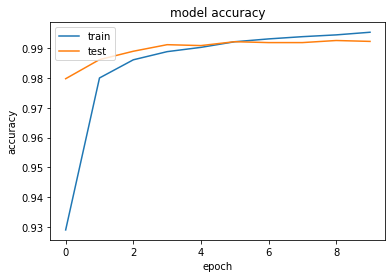

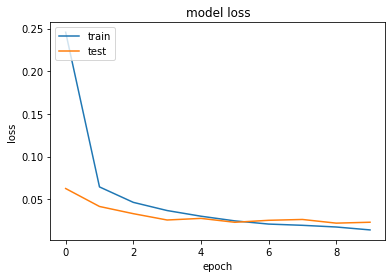

In [42]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
test = np.expand_dims(X_test[11],0)

In [0]:
predicted = model.predict(test)

In [47]:
predicted.shape


(1, 10)

In [54]:
test.shape

(1, 28, 28, 1)

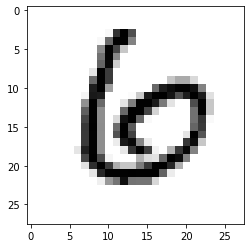

In [55]:
plt.imshow(test[0,:,:,0],cmap="gray_r")

In [56]:
np.argmax(predicted[0])

6